<a href="https://colab.research.google.com/github/sanjibsinha/hugging-face--google-colab/blob/main/Sentu1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install wordcloud
!pip install matplotlib

In [ ]:
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [ ]:
# Load the sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def extract_sentiment_words(text, sentiment_type):
    # Clean the input text: Remove non-alphabetic characters
    words = re.findall(r'\b\w+\b', text.lower())

    # Filter words based on sentiment (positive or negative)
    positive_words = set([
        "good", "great", "awesome", "happy", "love", "amazing", "fantastic", "positive", "joyful", "wonderful", "great", "excellent", "best"
    ])

    negative_words = set([
        "bad", "hate", "terrible", "sad", "angry", "horrible", "worst", "negative", "awful", "depressing", "miserable"
    ])

    if sentiment_type == "POSITIVE":
        return [word for word in words if word in positive_words]
    else:
        return [word for word in words if word in negative_words]

In [ ]:
def sentiment_wordcloud(text):
    # Perform sentiment analysis
    result = sentiment_analyzer(text)
    sentiment = result[0]['label']

    # Extract words based on sentiment
    if sentiment == "POSITIVE":
        words = extract_sentiment_words(text, "POSITIVE")
    else:
        words = extract_sentiment_words(text, "NEGATIVE")

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    return sentiment

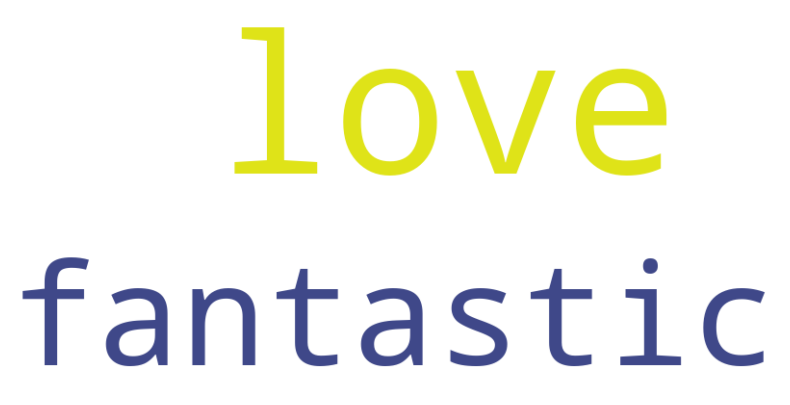

Sentiment: POSITIVE


In [ ]:
text_input = "I absolutely love the new features of this phone. It's fantastic!"
sentiment = sentiment_wordcloud(text_input)
print(f"Sentiment: {sentiment}")